In [1]:
using RelDist
using SintPowerGraphs
using SintPowerCase
using DataFrames
using MetaGraphs
using Graphs

using Plots
using GraphRecipes

In [16]:
network_filename = joinpath(@__DIR__, "excel_test.toml")
interruption_filename = joinpath(@__DIR__, "../../databases/interruption_FASIT2.json")
cost_filename = joinpath(@__DIR__, "../../databases/cost_functions_dummy.json")

interruption = read_interruption(interruption_filename)
cost_functions = read_cost_functions(cost_filename)

Dict{String, RelDist.PieceWiseCost} with 1 entry:
  "agriculture" => PieceWiseCost(RelDist.Piece[Piece(Bound(0.0, 0.017), 0.0, 1.…

In [17]:
case = Case(network_filename)

Case(100.0, 5×13 DataFrame
 Row │ ID      type   Pd       Qd       Gs       Bs       area_num  Vm       V ⋯
     │ String  Int64  Float64  Float64  Float64  Float64  Int64     Float64  F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ L1          1      5.0      0.0      0.0      0.0         1      1.0    ⋯
   2 │ L2          1      4.0      0.0      0.0      0.0         1      1.0
   3 │ L3          1      3.0      0.0      0.0      0.0         1      1.0
   4 │ L4          1      2.0      0.0      0.0      0.0         1      1.0
   5 │ T1          3      0.0      0.0      0.0      0.0         1      1.0    ⋯
                                                               5 columns omitted, 6×11 DataFrame
 Row │ ID      f_bus   t_bus   r      x      b      rateA  rateB  rateC  ratio ⋯
     │ String  String  String  Int64  Int64  Int64  Int64  Int64  Int64  Int64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────


In [18]:
network = RadialPowerGraph(case)

RadialPowerGraph({5, 6} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), Case(100.0, 5×13 DataFrame
 Row │ ID      type   Pd       Qd       Gs       Bs       area_num  Vm       V ⋯
     │ String  Int64  Float64  Float64  Float64  Float64  Int64     Float64  F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ L1          1      5.0      0.0      0.0      0.0         1      1.0    ⋯
   2 │ L2          1      4.0      0.0      0.0      0.0         1      1.0
   3 │ L3          1      3.0      0.0      0.0      0.0         1      1.0
   4 │ L4          1      2.0      0.0      0.0      0.0         1      1.0
   5 │ T1          3      0.0      0.0      0.0      0.0         1      1.0    ⋯
                                                               5 columns omitted, 6×11 DataFrame
 Row │ ID      f_bus   t_bus   r      x      b      rateA  rateB  rateC  ratio ⋯
     │ String  String  String  Int64  Int64  Int64 

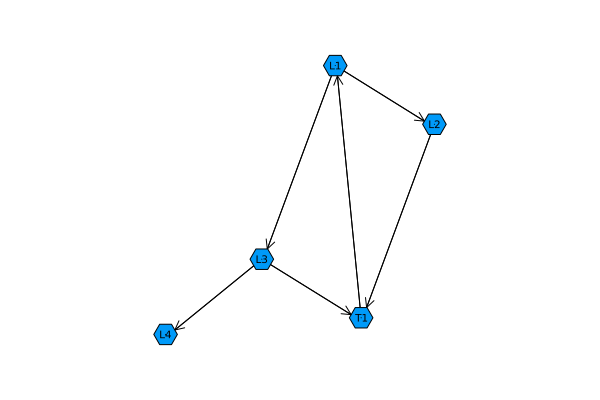

In [5]:
graphplot(network.G, curves=false, names=[props(network.G, v)[:name] for v in 1:nv(network.G)]
)

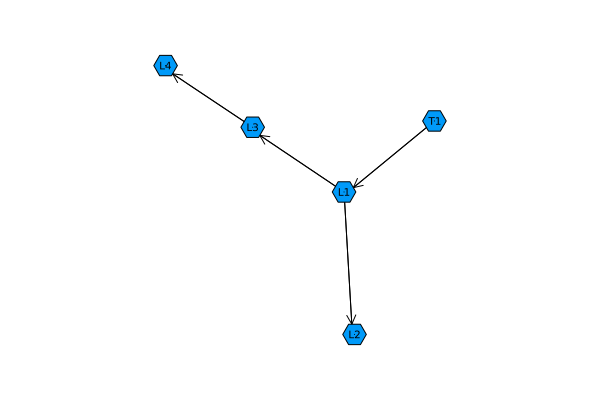

In [6]:
graphplot(network.radial, curves=false, names=[props(network.radial, v)[:name] for v in 1:nv(network.radial)]
)

In [7]:
rel_data = get_branch_data(network, :reldata, "T1", "L1")

Row,ID,f_bus,t_bus,repairTime,permanentFaultFrequency,temporaryFaultFrequency,sectioningTime,temporaryFaultTime
,String,String,String,Int64,Float64,Float64,Float64,Float64
1,K1,T1,L1,4,0.1,0.1,0.05,0.017


In [8]:
rel_data.temporaryFaultTime[1]

0.017

In [19]:
res, rest, L, edge_pos = relrad_calc(interruption, cost_functions, network)

[ Info: Processing line RelDist.Branch{String}("T1", "L1")
[ Info: Processing line RelDist.Branch{String}("L1", "L2")
[ Info: Processing line RelDist.Branch{String}("L1", "L3")
[ Info: Processing line RelDist.Branch{String}("L3", "L4")


(RelStruct([0.05 0.02 … 0.0 0.0; 0.05 0.02 … 0.0 0.0; 0.05 0.02 … 0.0 0.0; 0.05 0.02 … 0.0 0.0], [0.005000000000000001 0.001 … 0.0 0.0; 0.005000000000000001 0.001 … 0.0 0.0; 0.005000000000000001 0.001 … 0.0 0.0; 0.005000000000000001 0.001 … 0.0 0.0], [0.025000000000000005 0.005 … 0.0 0.0; 0.020000000000000004 0.004 … 0.0 0.0; 0.015000000000000003 0.003 … 0.0 0.0; 0.010000000000000002 0.002 … 0.0 0.0], [0.025 0.005 … 0.0 0.0; 0.020000000000000004 0.004 … 0.0 0.0; 0.015000000000000003 0.0030000000000000005 … 0.0 0.0; 0.010000000000000002 0.002 … 0.0 0.0]), RelStruct([0.017 0.017 … 0.0 0.0; 0.017 0.017 … 0.0 0.0; 0.017 0.017 … 0.0 0.0; 0.017 0.017 … 0.0 0.0], [0.0017000000000000001 0.0008500000000000001 … 0.0 0.0; 0.0017000000000000001 0.0008500000000000001 … 0.0 0.0; 0.0017000000000000001 0.0008500000000000001 … 0.0 0.0; 0.0017000000000000001 0.0008500000000000001 … 0.0 0.0], [0.0085 0.00425 … 0.0 0.0; 0.0068000000000000005 0.0034000000000000002 … 0.0 0.0; 0.0051 0.00255 … 0.0 0.0; 0.003

In [10]:
rest.ENS

4×6 Matrix{Float64}:
 0.0085  0.00425  0.01275  0.0085  0.0  0.0
 0.0068  0.0034   0.0102   0.0068  0.0  0.0
 0.0051  0.00255  0.00765  0.0051  0.0  0.0
 0.0034  0.0017   0.0051   0.0034  0.0  0.0

In [20]:
res.ENS

4×6 Matrix{Float64}:
 0.025  0.005  0.06225  0.0415  0.0  0.0
 0.02   0.004  0.0498   0.0332  0.0  0.0
 0.015  0.003  0.03735  0.0249  0.0  0.0
 0.01   0.002  0.0249   0.8     0.0  0.0

In [21]:
res.U

4×6 Matrix{Float64}:
 0.005  0.001  0.01245  0.0083  0.0  0.0
 0.005  0.001  0.01245  0.0083  0.0  0.0
 0.005  0.001  0.01245  0.0083  0.0  0.0
 0.005  0.001  0.01245  0.4     0.0  0.0

In [12]:
sum(rest.ENS; dims=2)

4×1 Matrix{Float64}:
 0.034
 0.027200000000000002
 0.0204
 0.013600000000000001

In [22]:
sum(res.ENS; dims=2)

4×1 Matrix{Float64}:
 0.13375
 0.10700000000000001
 0.08025
 0.8369000000000001

In [14]:
case.load

Row,ID,bus,P,ref_demand
,String,String,Int64,Int64
1,LL1,L1,5,5
2,LL2,L2,4,4
3,LL3,L3,3,3
4,LL4,L4,2,2
